# BIKE SHARING CASE STUDY

## Introduction

Bike sharing system is a shared transport service, in which bikes are made available for shared use to a individuals on a short term basis for a price or fee. Many bike sharing systems allows customers to borrow a bike from one dock and return it at another dock of a same system. There are many bike sharing companies like BLOOM, OFO, Mobike, BoomBikes, Bounce, joyride, evemo, etc in the world offering services in major metro cities.


## Problem Statement

A US bike sharing provider BoomBikes recently sufferered from revenue dips due to the ongoing corona pandemic.Because of the unexpected loss, the company is finding it difficult to sustain in the current market scenario. so it has decided to come up with the mindful business plan so that they can able to accelerate their revenue once the pandemic comes to an end and also boost the economy.
The company BoomBikes wanted to improve their business, they actually wanted to understand the demand of the shared bikes among the people once the pandemic comes to an end. They have planned this to prepare themselves to cater to the people's need and need to stand out among the competetors and to make huge profits.

## Business Objectives

The company specifically need to understand the factors affecting the demand of the shared bikes. They wants to find:

- Which variables are significant in predicting the demand of the shared bikes
- How well the variables describe the demand of the shared bikes We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demand varies with different features

## Data Understanding

day.csv'

It contains the meterological informations, timing details and people's styles.

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
   - Clear, Few clouds, Partly cloudy, Partly cloudy
   - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Data Preparation

## Importing libraries

In [148]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels
import statsmodels.api as sm
import sklearn
import warnings
warnings.filterwarnings("ignore")

## Customizing Settings 

In [149]:
# Customizing the settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

## Importing Data

In [150]:
# Importing the data
bike = pd.read_csv("E:\\UPGRAD\MACHINE LANGUAGE-1\\\Linear Regression Assignment\\day.csv", index_col=0)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Fixing Rows and Columns

In [151]:
# Analyzing the shape of the data
print("The shape of the bike sharing data is",bike.shape)

The shape of the bike sharing data is (730, 15)


In [152]:
# Checking the informations
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [153]:
# Checking for null values in all the columns
round((bike.isnull().sum()/len(bike))*100,2).sort_values(ascending=False)

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

There are no missing values in any of the rows or columns of the dataset

In [154]:
# Checking the unique values in the columns of the dataset
bike.apply(lambda x:len(x.unique()))

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [155]:
# Checking for duplicates
bike[bike.duplicated()]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,


No duplicate records are there in the dataset

In [156]:
# Changing the dteday column into datetime category to extract the day
bike["dteday"] = pd.to_datetime(bike["dteday"],format = "%d-%m-%Y")

# Extracting the weekday and day from dteday column
bike["Day_of_month"] = pd.DatetimeIndex(bike["dteday"]).day
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Day_of_month
instant,,,,,,,,,,,,,,,,
1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


## Removing Redundant columns
## 1. dteday column:
   - Already all the required informations are extracted from this column and new columns are created like year, month, day and  the details of the day. Thus we can drop this column too.
   - The atemp column(feel like temperature) is depend on the air temperature. thus it will be highly correlated. Thus we can drop this column. #### 3. casual and registered columns:
   - Using this features for the model will results in data leakage.
   - Both these columns contains count of bike booked by the customers who casually using without registering and those who have registered already. However we have an another column which have total counts of both which we will be using as dependent variable. so thus we can drop these two columns.

In [157]:
# Dropping dteday, atemp, causal, and registered column
bike.drop(["dteday","atemp","casual","registered"], axis=1,inplace=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        730 non-null    int64  
 1   yr            730 non-null    int64  
 2   mnth          730 non-null    int64  
 3   holiday       730 non-null    int64  
 4   weekday       730 non-null    int64  
 5   workingday    730 non-null    int64  
 6   weathersit    730 non-null    int64  
 7   temp          730 non-null    float64
 8   hum           730 non-null    float64
 9   windspeed     730 non-null    float64
 10  cnt           730 non-null    int64  
 11  Day_of_month  730 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 74.1 KB


In [158]:
# Lets rename the column name for our convenience
bike.rename(columns={"yr":"Year","mnth":"Month","weathersit":"Weather","temp":"Temperature","hum":"Humidity","cnt":"Count"},
           inplace=True)
bike.columns = bike.columns.str.strip().str.capitalize()
bike.index.name = "Index"
bike.columns.name = "Features"

In [159]:
bike.head()

Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month
Index,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1
2,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,2
3,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,3
4,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,4
5,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,5


## Handling Data Types

In [160]:
# Checking the data types of the dataset
bike.dtypes

Features
Season            int64
Year              int64
Month             int64
Holiday           int64
Weekday           int64
Workingday        int64
Weather           int64
Temperature     float64
Humidity        float64
Windspeed       float64
Count             int64
Day_of_month      int64
dtype: object

In [161]:
# Creating a new variable Quartely before converting the month into categorical variable
bike["Quarterly"] = pd.cut(bike["Month"], bins=[0,3,6,9,12], labels=["first","second","third","fourth"])

# Giving exact names for some categorical column instead of number for easy interpretation
bike["Season"] = bike["Season"].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike["Year"] = bike["Year"].replace({0: "2018", 1:"2019"})
bike["Weekday"] = bike["Weekday"].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",
                                           6:"Sat"})
bike["Month"] = bike["Month"].replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun",
                                      7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
bike.head(3)

Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month,Quarterly
Index,,,,,,,,,,,,,
1,spring,2018,Jan,0,Sat,0,2,14.110847,80.5833,10.749882,985,1,first
2,spring,2018,Jan,0,Sun,0,2,14.902598,69.6087,16.652113,801,2,first
3,spring,2018,Jan,0,Mon,1,1,8.050924,43.7273,16.636703,1349,3,first


We know that the columns Season, Year, Month, Holiday, Weekday, Workingday, Weather, Day of month are categorical variables but expressed as integer. thus we need to change it into categorical types. So that we can create dummy variables.

In [162]:
# Converting the columns into categorical types
bike_cat = ["Season","Year","Month","Holiday","Weekday","Workingday","Weather","Day_of_month"]

for cols in bike_cat:
    bike[cols] = bike[cols].astype("category")
    
print(bike.dtypes)

Features
Season          category
Year            category
Month           category
Holiday         category
Weekday         category
Workingday      category
Weather         category
Temperature      float64
Humidity         float64
Windspeed        float64
Count              int64
Day_of_month    category
Quarterly       category
dtype: object


## Sanity Checks

In [163]:
# Neither weekends nor holidays are working days
bike[((bike["Holiday"]==1) | (bike["Weekday"].isin(["Sat","Sun"]))) & (bike["Workingday"] == 1) ]

Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month,Quarterly
Index,,,,,,,,,,,,,


No holidays or weekends are represented as working day.

In [164]:
# Humidity can't be zero
bike[bike["Humidity"]==0]

Features,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count,Day_of_month,Quarterly
Index,,,,,,,,,,,,,
69,spring,2018,Mar,0,Thu,1,3,15.952731,0.0,17.545759,623,10,first


There is one row with zero humidity value, thus we can drop that.

In [165]:
# Dropping the row with zero humidity
bike = bike[-(bike["Humidity"]==0)]
print("The shape of the dataset is", bike.shape)

The shape of the dataset is (729, 13)


## Data Visualization

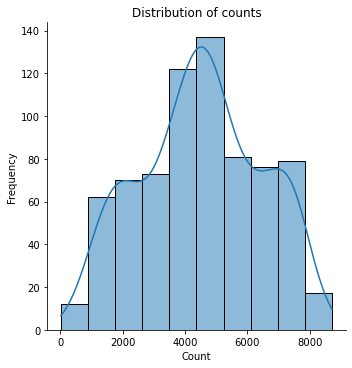

In [166]:
# Checking the distribution of counts
sns.displot(bike["Count"], bins=10, kde=True)
plt.title("Distribution of counts")
plt.ylabel("Frequency")
plt.show()

### Inference from the plot
   - The distribution of the counts is almost normally distributed.
   - On average around 4500 customers utilizing the bike service per day.

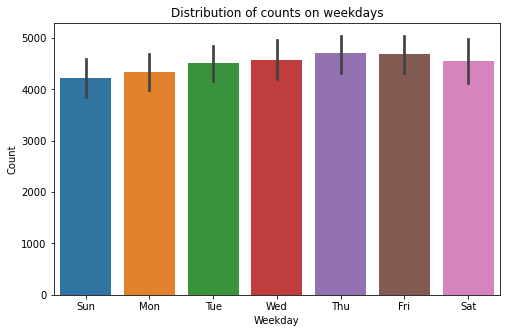

In [167]:
# Checking the counts on weekdays 
plt.figure(figsize=[8,5])
month_order = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
sns.barplot(data=bike, x="Weekday", y=bike["Count"], order=month_order)
plt.title("Distribution of counts on weekdays")
plt.show()

###  Inference from the plot
   - The usage of bike is less on sundays.
   - The usage of bike is more on thursday and friday

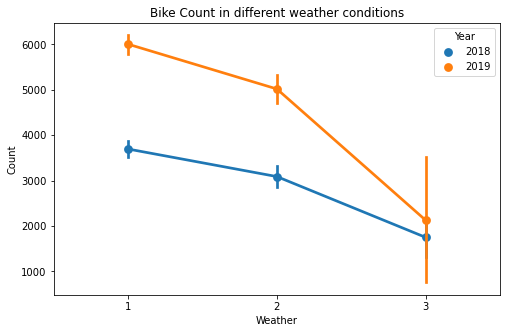

In [168]:
# Checking the counts with respect to weather
fig, ax = plt.subplots(figsize=[8,5])
sns.pointplot(data=bike, x="Weather", y="Count", hue="Year")
ax.set(title="Bike Count in different weather conditions")
plt.show()

###  Inference from the plot
   - when there is light snow, light rain, thunderstorm the number of bike users decreases.
   - From the data it is evident that, when there is heavy rain, ice pallets, snow and fog, no one uses the bike.
   - The number of users were increased by 2019 with significant increase.

Text(0.5, 1.0, 'Counts on Holiday')

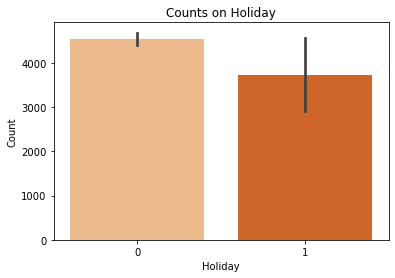

In [169]:
# Checking the distribution on holidays
plt.figure(figsize=[6,4])
sns.barplot(data=bike, x="Holiday", y="Count",palette="Oranges")
plt.title("Counts on Holiday")

### Inference from the plot
   - The number of bike users are less on holidays.

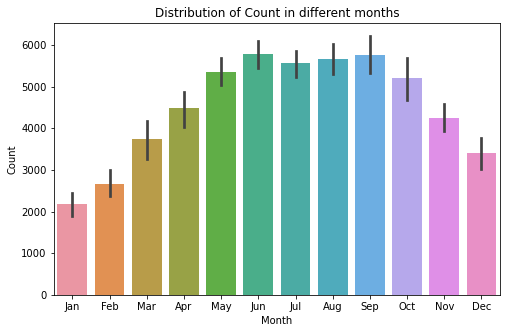

In [170]:
# Checking the distribution of counts on different months
plt.figure(figsize=[8,5])
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
sns.barplot(data=bike, x="Month", y="Count",order=month_order)
plt.title("Distribution of Count in different months")
plt.show()

### Inference from the plot
   - The number of counts is very less on january month.
   - Most counts are in the month june to sep.
   
   
### Derived columns:
  #### 1. Part_month:
   - Dividing the month into three parts
   - first(first-10), second(11-20), third(20-last)
   
  #### 2. Quarterly:
   - Dividing the year into four parts
   - first(Jan,Feb,Mar), second(Apr,May,Jun), third(Jul,Aug,Sep), fourth(Oct,Nov,Dec)

In [171]:
# Creating a new variable part_month
bike["Part_month"] = pd.cut(bike["Day_of_month"], bins=[0,10,20,35], labels=["First_half","Second_half","Third_half"])

# Deleting the Day_of_month column, as we created a bin out of it.
bike.drop("Day_of_month", axis=1, inplace=True)

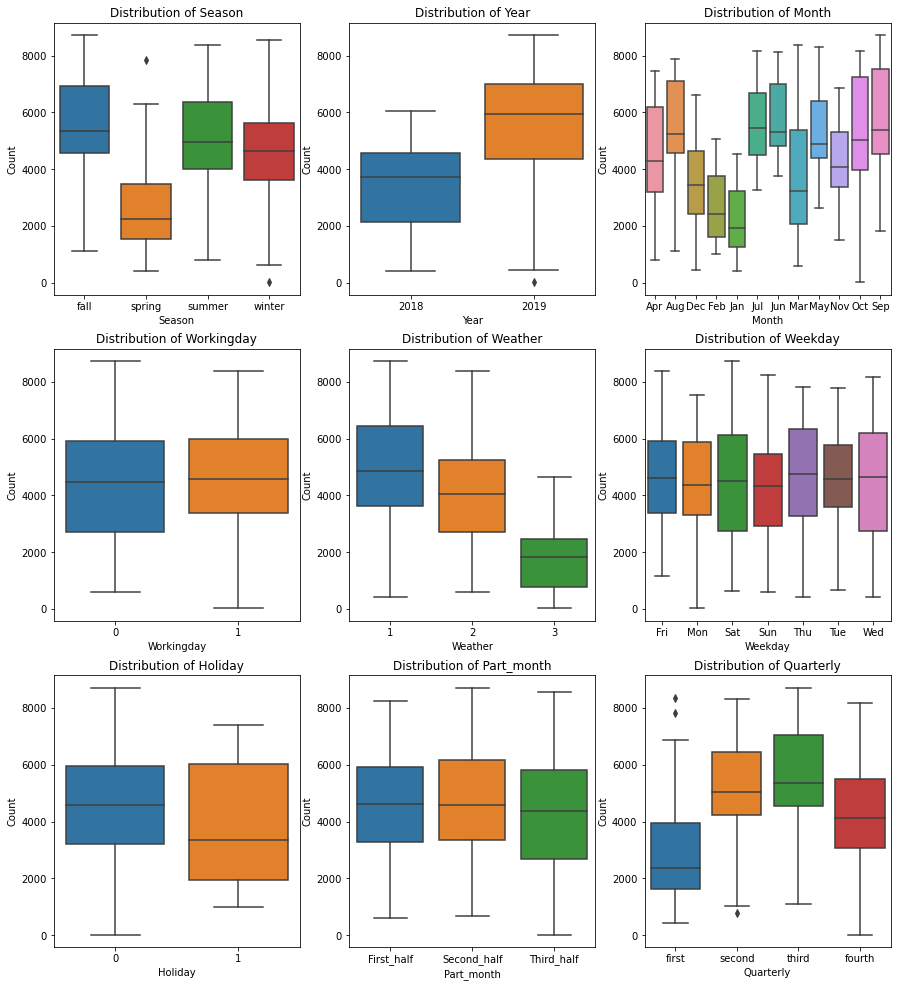

In [172]:
# Creating a function for boxplot
def boxplot(a,b):
    plt.subplot(3,3,a)
    plt.title("Distribution of"+" "+b)
    sns.boxplot(data=bike, x=b, y="Count")

# Plotting the boxplot for all categorical variables
plt.figure(figsize=[15,17])
Cat_bike = ["Season","Year","Month","Workingday","Weather","Weekday","Holiday","Part_month","Quarterly"]#Categorical data of bike
ax = 1
for i in Cat_bike:
    boxplot(ax,i)
    ax+=1  

### Inference from the plot
 - The number of bike users in spring is very low.
 - The count has increased significantly in 2019.
 - The count is less on holidays
 - The count is less on sundays
 - The number of bike users are more in clear, few clouds climate.
 - From the distribution of part_month it is evident that in the third half the count is less.
 - In the middle of the year the count is increasing. and in the first quarter of the year the count is very less.

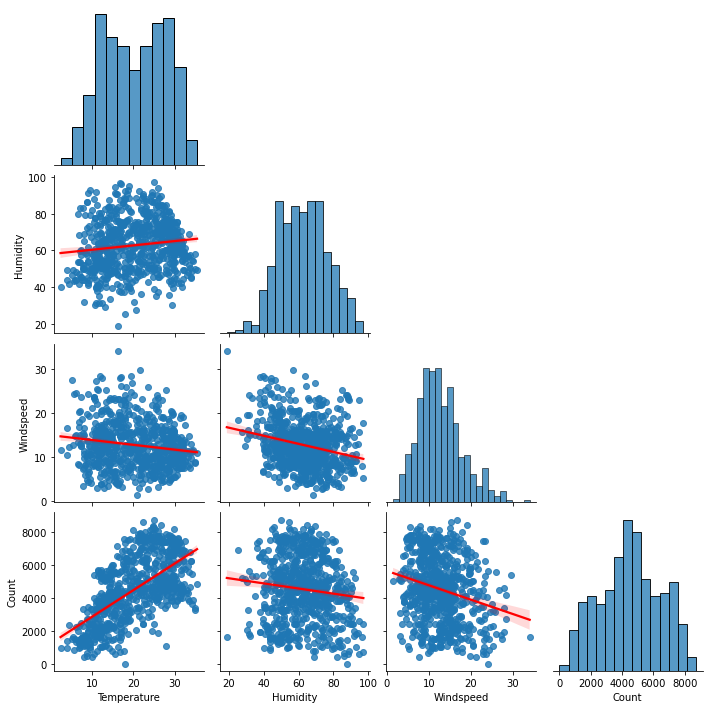

In [173]:
# Plotting pairplot for continuous variable
sns.pairplot(data=bike, vars=["Temperature","Humidity","Windspeed","Count"],  corner=True, kind="reg",
            plot_kws= {"line_kws":{"color":"red"}})
plt.show()

### Inference from the plot
 - There is high positive correlation between temperature and count.
 - There is negative correlation between count and windspeed.
 - Humidity and windspeed are negatively correlated.

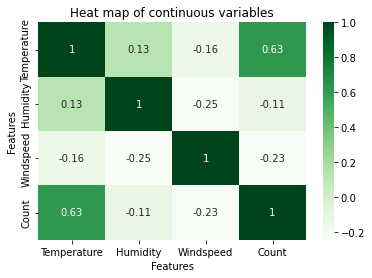

In [174]:
# Plotting heat map of continuos variable
sns.heatmap(bike.corr(), cmap="Greens", annot=True)
plt.title("Heat map of continuous variables")
plt.show()

### Inference from the plot
 - From the heat map it is evident that there is high positive correlation between temperature and count.

## Dummy variables creation: 

In [175]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 1 to 730
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Season       729 non-null    category
 1   Year         729 non-null    category
 2   Month        729 non-null    category
 3   Holiday      729 non-null    category
 4   Weekday      729 non-null    category
 5   Workingday   729 non-null    category
 6   Weather      729 non-null    category
 7   Temperature  729 non-null    float64 
 8   Humidity     729 non-null    float64 
 9   Windspeed    729 non-null    float64 
 10  Count        729 non-null    int64   
 11  Quarterly    729 non-null    category
 12  Part_month   729 non-null    category
dtypes: category(9), float64(3), int64(1)
memory usage: 52.8 KB


In [176]:
# Creating dummy variable for categorical features
status = pd.get_dummies(bike[Cat_bike], drop_first=True)

# Concatenating the dummies to the original dataset
bike = pd.concat([bike, status], axis=1)

#dropping the original features as we created the dummies for that
bike.drop(Cat_bike, axis=1, inplace=True)
print("The shape of the bike dataset after creating dummy variables is",bike.shape)
bike.head()

The shape of the bike dataset after creating dummy variables is (729, 34)


,Temperature,Humidity,Windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Workingday_1,Weather_2,Weather_3,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Holiday_1,Part_month_Second_half,Part_month_Third_half,Quarterly_second,Quarterly_third,Quarterly_fourth
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [177]:
bike.describe()

,Temperature,Humidity,Windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Workingday_1,Weather_2,Weather_3,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Holiday_1,Part_month_Second_half,Part_month_Third_half,Quarterly_second,Quarterly_third,Quarterly_fourth
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,20.325249,62.851273,12.757060,4513.336077,0.245542,0.252401,0.244170,0.500686,0.085048,0.085048,0.076818,0.085048,0.085048,0.082305,0.083676,0.085048,0.082305,0.085048,0.082305,0.683128,0.337449,0.027435,0.144033,0.144033,0.144033,0.141289,0.142661,0.141289,0.028807,0.329218,0.342936,0.249657,0.252401,0.252401
std,7.510137,14.055910,5.196382,1931.975331,0.430704,0.434688,0.429889,0.500343,0.279145,0.279145,0.266485,0.279145,0.279145,0.275017,0.277092,0.279145,0.275017,0.279145,0.275017,0.465577,0.473164,0.163459,0.351364,0.351364,0.351364,0.348559,0.349967,0.348559,0.167377,0.470252,0.475016,0.433112,0.434688,0.434688
min,2.424346,18.791700,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.803347,52.000000,9.041650,3190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.500000,62.666700,12.125325,4549.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.889153,73.000000,15.624936,5976.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


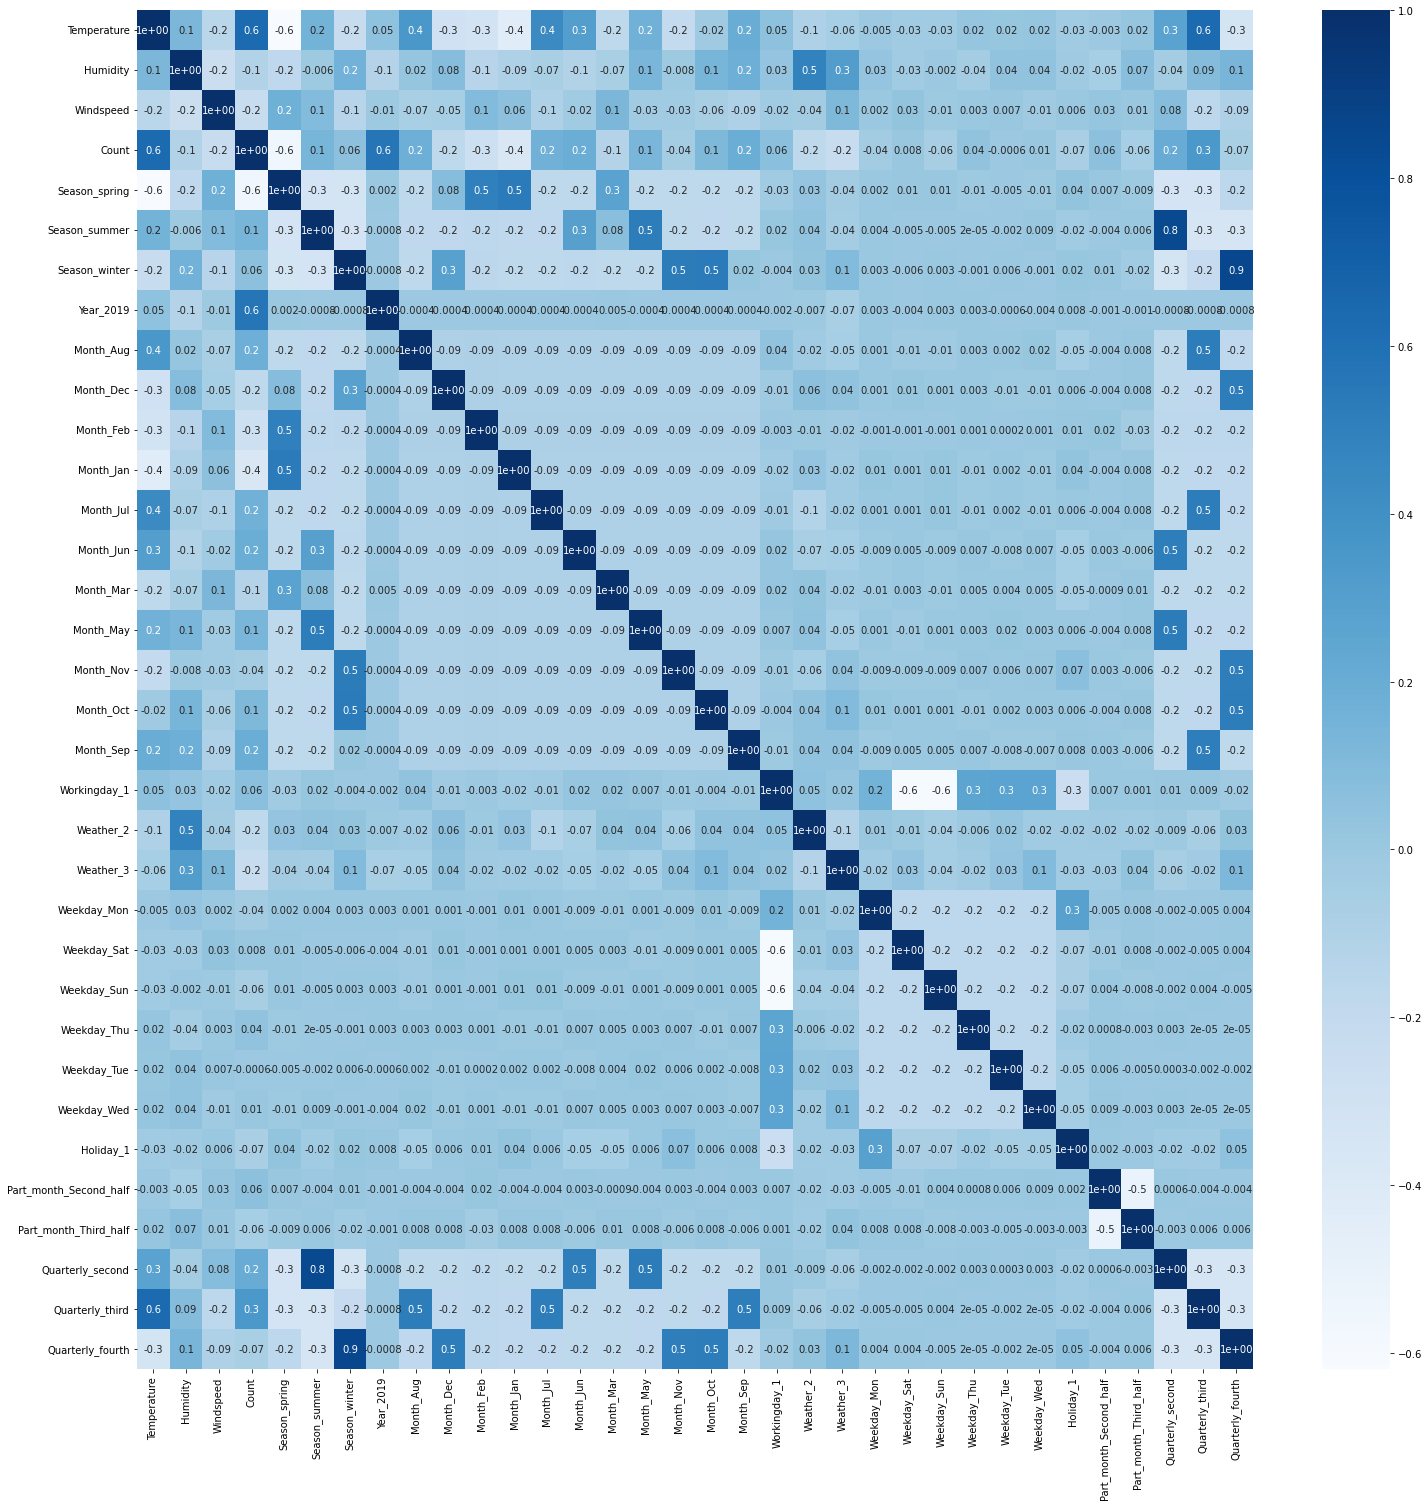

In [178]:
# Plotting a heatmap to visualize the correlation of all dummy variables
plt.figure(figsize=[25,25])
sns.heatmap(bike.corr(), cmap="Blues", annot=True, fmt="0.1")
plt.show()

### Inference from the plot
  - From the heat map we can easily find out the independent variables that are highly correlated, so that we can eliminate the feature to avoid multicollinearity.

## Splitting into train/test set:

In [179]:
# Importing train_test_split and MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Splitting into train set and test set
bike_train, bike_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)
print("The shape of the train dataset is",bike_train.shape)
print("The shape of the test dataset is", bike_test.shape)

The shape of the train dataset is (510, 34)
The shape of the test dataset is (219, 34)


## Rescaling the train set:

In [180]:
# Creating a list of numerical variables
Num_bike = ["Temperature","Humidity","Windspeed","Count"]

# Scaling the numerical variables with min max scaler
scaler = MinMaxScaler()
bike_train[Num_bike] = scaler.fit_transform(bike_train[Num_bike])
bike_train.describe()

,Temperature,Humidity,Windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Workingday_1,Weather_2,Weather_3,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed,Holiday_1,Part_month_Second_half,Part_month_Third_half,Quarterly_second,Quarterly_third,Quarterly_fourth
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.540678,0.571669,0.318011,0.496352,0.243137,0.243137,0.247059,0.511765,0.090196,0.094118,0.066667,0.084314,0.080392,0.074510,0.094118,0.090196,0.082353,0.080392,0.088235,0.674510,0.349020,0.021569,0.137255,0.139216,0.158824,0.149020,0.135294,0.141176,0.027451,0.327451,0.356863,0.239216,0.258824,0.256863
std,0.225277,0.182541,0.170567,0.235715,0.429398,0.429398,0.431725,0.500352,0.286744,0.292279,0.249689,0.278131,0.272166,0.262857,0.292279,0.286744,0.275172,0.272166,0.283915,0.469018,0.477128,0.145413,0.344454,0.346511,0.365870,0.356457,0.342373,0.348545,0.163554,0.469744,0.479544,0.427024,0.438419,0.437332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350497,0.431818,0.192829,0.333213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.575578,0.296767,0.498008,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.742223,0.704680,0.414082,0.685832,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Creating dependent and independent variables of train set: 

In [181]:
# Creating X_train and y_train from training dataset
y_train = bike_train.pop("Count")
X_train = bike_train
print("The shape of y_train is", y_train.shape)
print("The shape of X_train is", X_train.shape)

The shape of y_train is (510,)
The shape of X_train is (510, 33)


# Model Building

In [182]:
# Importing RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### RFE:
   - Recursive feature elimination is a method of automatic feature elimination. and using this lets reduce the features upto considerable count where we can perform manual feature selection.

In [183]:
# Calling the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE
rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)
 


In [184]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Temperature', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', False, 8),
 ('Season_winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_Aug', False, 18),
 ('Month_Dec', True, 1),
 ('Month_Feb', True, 1),
 ('Month_Jan', True, 1),
 ('Month_Jul', True, 1),
 ('Month_Jun', False, 11),
 ('Month_Mar', False, 9),
 ('Month_May', False, 2),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 5),
 ('Month_Sep', True, 1),
 ('Workingday_1', True, 1),
 ('Weather_2', True, 1),
 ('Weather_3', True, 1),
 ('Weekday_Mon', False, 13),
 ('Weekday_Sat', True, 1),
 ('Weekday_Sun', False, 7),
 ('Weekday_Thu', False, 14),
 ('Weekday_Tue', False, 15),
 ('Weekday_Wed', False, 17),
 ('Holiday_1', False, 3),
 ('Part_month_Second_half', False, 6),
 ('Part_month_Third_half', False, 12),
 ('Quarterly_second', False, 16),
 ('Quarterly_third', False, 10),
 ('Quarterly_fourth', False, 4)]

In [185]:
# Extracting the columns from the X_train that are selected through RFE
col = X_train.columns[rfe.support_]

# Creating a new dataset with features selected by RFE
X_train_rfe = X_train[col]
X_train_rfe.shape

(510, 16)

In [186]:
# Importing variance inflation factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a function that gives vif table for the dataframe input
def vif_table(a):
    vif = pd.DataFrame()
    X = a.drop("const", axis=1)
    vif["features"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
    return vif.sort_values(by = "VIF", ascending=False)

## Model 1

In [187]:
# Adding constant to the varible
X_train_1 = sm.add_constant(X_train_rfe)

# Creating model 1
model_1 = sm.OLS(y_train, X_train_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     176.0
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          6.40e-192
Time:                        05:49:04   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -964.6
Df Residuals:                     493   BIC:                            -892.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2533      0.030      8.399      0.000       0.194       0.313
Temperature       0.4714      0.034     13.680      0.000       0.404       0.539
Humidity         -0.1417      0.032     -4.400      0.000      -0.205      -0.078
Windspeed        -0.1739      0.027     -6.547      0.000      -0.226      -0.122
Season_spring    -0.0865      0.018     -4.838      0.000      -0.122      -0.051
Season_winter     0.0867      0.014      6.042      0.000       0.058       0.115
Year_2019         0.2378      0.008     28.350      0.000       0.221       0.254
Month_Dec        -0.0619      0.018     -3.473      0.001      -0.097      -0.027
Month_Feb        -0.0501      0.022     -2.259      0.024      -0.094      -0.007
Month_Jan        -0.0685      0.022     -3.174      0.002      -0.111      -0.026
Month_Jul        -0.0738      0.018     -4.216      0.000      -0.108      -0.039
Month_Nov        -0.0697      0.019     -3.587      0.000      -0.108      -0.032
Month_Sep         0.0577      0.015      3.764      0.000       0.028       0.088
Workingday_1      0.0576      0.011      5.341      0.000       0.036       0.079
Weather_2        -0.0535      0.011     -4.897      0.000      -0.075      -0.032
Weather_3        -0.2038      0.032     -6.321      0.000      -0.267      -0.140
Weekday_Sat       0.0584      0.015      4.002      0.000       0.030       0.087
==============================================================================
Omnibus:                       80.847   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.836
Skew:                          -0.776   Prob(JB):                     1.11e-48
Kurtosis:                       5.825   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
# Checking vif values
vif_table(X_train_1)

,features,VIF
1,Humidity,17.51
0,Temperature,15.61
2,Windspeed,4.28
12,Workingday_1,4.28
3,Season_spring,4.13
4,Season_winter,2.78
13,Weather_2,2.43
8,Month_Jan,2.20
5,Year_2019,2.12
7,Month_Feb,1.89


### Suggestion:
  - We can drop Humidity feature as it have high vif value.

## Model 2

In [189]:
# Dropping the humidity column
X_train_rfe2 =  X_train_rfe.drop("Humidity", axis=1)

# Adding constant 
X_train_2 = sm.add_constant(X_train_rfe2)

# Building model
model_2 = sm.OLS(y_train, X_train_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          5.93e-189
Time:                        05:49:04   Log-Likelihood:                 489.47
No. Observations:                 510   AIC:                            -946.9
Df Residuals:                     494   BIC:                            -879.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1920      0.027      7.048      0.000       0.138       0.245
Temperature       0.4325      0.034     12.752      0.000       0.366       0.499
Windspeed        -0.1365      0.026     -5.327      0.000      -0.187      -0.086
Season_spring    -0.0920      0.018     -5.064      0.000      -0.128      -0.056
Season_winter     0.0789      0.014      5.440      0.000       0.050       0.107
Year_2019         0.2431      0.008     28.749      0.000       0.226       0.260
Month_Dec        -0.0681      0.018     -3.763      0.000      -0.104      -0.033
Month_Feb        -0.0498      0.023     -2.205      0.028      -0.094      -0.005
Month_Jan        -0.0715      0.022     -3.255      0.001      -0.115      -0.028
Month_Jul        -0.0636      0.018     -3.595      0.000      -0.098      -0.029
Month_Nov        -0.0716      0.020     -3.622      0.000      -0.110      -0.033
Month_Sep         0.0527      0.016      3.381      0.001       0.022       0.083
Workingday_1      0.0596      0.011      5.428      0.000       0.038       0.081
Weather_2        -0.0821      0.009     -9.187      0.000      -0.100      -0.065
Weather_3        -0.2667      0.029     -9.058      0.000      -0.325      -0.209
Weekday_Sat       0.0633      0.015      4.270      0.000       0.034       0.092
==============================================================================
Omnibus:                       82.346   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.412
Skew:                          -0.775   Prob(JB):                     7.60e-52
Kurtosis:                       5.945   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
# Checking vif values
vif_table(X_train_2)

,features,VIF
0,Temperature,6.83
11,Workingday_1,4.23
1,Windspeed,4.20
2,Season_spring,3.84
3,Season_winter,2.53
7,Month_Jan,2.13
4,Year_2019,2.10
6,Month_Feb,1.87
9,Month_Nov,1.78
14,Weekday_Sat,1.66


### Suggestion:
  - We can drop month_Jan as it have high p-value

## Model 3

In [191]:
# Dropping Month nov feature
X_train_rfe3 = X_train_rfe2.drop("Month_Jan", axis=1)

# Adding constant
X_train_3 = sm.add_constant(X_train_rfe3)

# Building model
Model_3 = sm.OLS(y_train, X_train_3).fit()
Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.1
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          7.82e-188
Time:                        05:49:04   Log-Likelihood:                 484.06
No. Observations:                 510   AIC:                            -938.1
Df Residuals:                     495   BIC:                            -874.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1656      0.026      6.307      0.000       0.114       0.217
Temperature       0.4669      0.033     14.350      0.000       0.403       0.531
Windspeed        -0.1259      0.026     -4.904      0.000      -0.176      -0.075
Season_spring    -0.1178      0.016     -7.141      0.000      -0.150      -0.085
Season_winter     0.0782      0.015      5.343      0.000       0.049       0.107
Year_2019         0.2423      0.009     28.399      0.000       0.226       0.259
Month_Dec        -0.0474      0.017     -2.770      0.006      -0.081      -0.014
Month_Feb        -0.0115      0.019     -0.590      0.555      -0.050       0.027
Month_Jul        -0.0697      0.018     -3.926      0.000      -0.105      -0.035
Month_Nov        -0.0616      0.020     -3.124      0.002      -0.100      -0.023
Month_Sep         0.0524      0.016      3.332      0.001       0.021       0.083
Workingday_1      0.0602      0.011      5.433      0.000       0.038       0.082
Weather_2        -0.0828      0.009     -9.177      0.000      -0.101      -0.065
Weather_3        -0.2652      0.030     -8.922      0.000      -0.324      -0.207
Weekday_Sat       0.0643      0.015      4.298      0.000       0.035       0.094
==============================================================================
Omnibus:                       71.860   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.459
Skew:                          -0.681   Prob(JB):                     1.09e-44
Kurtosis:                       5.770   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
# Checking vif values
vif_table(X_train_3)

,features,VIF
0,Temperature,6.73
1,Windspeed,4.20
10,Workingday_1,4.20
3,Season_winter,2.47
2,Season_spring,2.26
4,Year_2019,2.09
8,Month_Nov,1.76
13,Weekday_Sat,1.65
11,Weather_2,1.55
5,Month_Dec,1.50


### Suggestion:
  - We can drop Windspeed feature, as the temperature and workingday will be useful for the interpretation of the model.

## Model 4 

In [193]:
# Dropping windspeed feature
X_train_rfe4 = X_train_rfe3.drop("Windspeed", axis=1)

# Creating constant
X_train_4 = sm.add_constant(X_train_rfe4)

# Building model
Model_4 = sm.OLS(y_train, X_train_4).fit()
Model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          6.60e-184
Time:                        05:49:05   Log-Likelihood:                 471.96
No. Observations:                 510   AIC:                            -915.9
Df Residuals:                     496   BIC:                            -856.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1189      0.025      4.751      0.000       0.070       0.168
Temperature       0.4751      0.033     14.293      0.000       0.410       0.540
Season_spring    -0.1208      0.017     -7.165      0.000      -0.154      -0.088
Season_winter     0.0863      0.015      5.803      0.000       0.057       0.116
Year_2019         0.2424      0.009     27.768      0.000       0.225       0.260
Month_Dec        -0.0449      0.017     -2.569      0.011      -0.079      -0.011
Month_Feb        -0.0142      0.020     -0.714      0.476      -0.053       0.025
Month_Jul        -0.0626      0.018     -3.458      0.001      -0.098      -0.027
Month_Nov        -0.0646      0.020     -3.202      0.001      -0.104      -0.025
Month_Sep         0.0573      0.016      3.570      0.000       0.026       0.089
Workingday_1      0.0605      0.011      5.339      0.000       0.038       0.083
Weather_2        -0.0818      0.009     -8.863      0.000      -0.100      -0.064
Weather_3        -0.2774      0.030     -9.157      0.000      -0.337      -0.218
Weekday_Sat       0.0628      0.015      4.102      0.000       0.033       0.093
==============================================================================
Omnibus:                       71.557   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.660
Skew:                          -0.647   Prob(JB):                     7.36e-49
Kurtosis:                       5.959   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
# Checking vif
vif_table(X_train_4)

,features,VIF
0,Temperature,5.31
9,Workingday_1,4.14
2,Season_winter,2.47
3,Year_2019,2.09
1,Season_spring,1.96
7,Month_Nov,1.75
12,Weekday_Sat,1.63
10,Weather_2,1.55
4,Month_Dec,1.50
5,Month_Feb,1.41


### Suggestion:
  - We can drop Month Dec feature as it have high p-value

## Model 5

In [195]:
# Dropping Holiday_1 feature
X_train_rfe5 = X_train_rfe4.drop("Month_Dec", axis=1)

# Adding constant
X_train_5 = sm.add_constant(X_train_rfe5)

# Building model
Model_5 = sm.OLS(y_train, X_train_5).fit()
Model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          1.18e-183
Time:                        05:49:05   Log-Likelihood:                 468.59
No. Observations:                 510   AIC:                            -911.2
Df Residuals:                     497   BIC:                            -856.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1069      0.025      4.323      0.000       0.058       0.155
Temperature       0.4930      0.033     15.080      0.000       0.429       0.557
Season_spring    -0.1218      0.017     -7.183      0.000      -0.155      -0.088
Season_winter     0.0727      0.014      5.202      0.000       0.045       0.100
Year_2019         0.2419      0.009     27.565      0.000       0.225       0.259
Month_Feb        -0.0059      0.020     -0.300      0.764      -0.045       0.033
Month_Jul        -0.0654      0.018     -3.599      0.000      -0.101      -0.030
Month_Nov        -0.0454      0.019     -2.410      0.016      -0.082      -0.008
Month_Sep         0.0609      0.016      3.784      0.000       0.029       0.092
Workingday_1      0.0605      0.011      5.308      0.000       0.038       0.083
Weather_2        -0.0817      0.009     -8.807      0.000      -0.100      -0.063
Weather_3        -0.2814      0.030     -9.251      0.000      -0.341      -0.222
Weekday_Sat       0.0615      0.015      4.000      0.000       0.031       0.092
==============================================================================
Omnibus:                       65.559   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.122
Skew:                          -0.611   Prob(JB):                     5.20e-42
Kurtosis:                       5.730   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
# Checking vif values
vif_table(X_train_5)

,features,VIF
0,Temperature,5.26
8,Workingday_1,4.12
3,Year_2019,2.09
2,Season_winter,1.90
1,Season_spring,1.87
11,Weekday_Sat,1.62
9,Weather_2,1.54
6,Month_Nov,1.53
4,Month_Feb,1.38
5,Month_Jul,1.37


### Suggestion:
  - We can drop Month Nov feature as it have high p-value.

## Model 6 

In [197]:
# Dropping month_mar feature
X_train_rfe6 = X_train_rfe5.drop("Month_Nov", axis=1)

# Adding constant
X_train_6 = sm.add_constant(X_train_rfe6)

# Building model
Model_6 = sm.OLS(y_train, X_train_6).fit()
Model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.0
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          1.37e-183
Time:                        05:49:05   Log-Likelihood:                 465.63
No. Observations:                 510   AIC:                            -907.3
Df Residuals:                     498   BIC:                            -856.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0996      0.025      4.038      0.000       0.051       0.148
Temperature       0.5026      0.033     15.415      0.000       0.439       0.567
Season_spring    -0.1178      0.017     -6.949      0.000      -0.151      -0.085
Season_winter     0.0600      0.013      4.612      0.000       0.034       0.086
Year_2019         0.2415      0.009     27.394      0.000       0.224       0.259
Month_Feb        -0.0056      0.020     -0.282      0.778      -0.045       0.033
Month_Jul        -0.0664      0.018     -3.639      0.000      -0.102      -0.031
Month_Sep         0.0644      0.016      3.999      0.000       0.033       0.096
Workingday_1      0.0605      0.011      5.283      0.000       0.038       0.083
Weather_2        -0.0803      0.009     -8.629      0.000      -0.099      -0.062
Weather_3        -0.2863      0.031     -9.388      0.000      -0.346      -0.226
Weekday_Sat       0.0626      0.015      4.048      0.000       0.032       0.093
==============================================================================
Omnibus:                       66.064   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.971
Skew:                          -0.620   Prob(JB):                     9.23e-42
Kurtosis:                       5.712   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
# Checking vif values
vif_table(X_train_6)

,features,VIF
0,Temperature,5.26
7,Workingday_1,4.11
3,Year_2019,2.09
1,Season_spring,1.87
10,Weekday_Sat,1.62
8,Weather_2,1.54
2,Season_winter,1.39
4,Month_Feb,1.38
5,Month_Jul,1.37
6,Month_Sep,1.20


### Suggestion: 
  - We can drop Weekday sat feature

## Model 7 

In [199]:
# Dropping month_mar feature
X_train_rfe7 = X_train_rfe6.drop("Weekday_Sat", axis=1)

# Adding constant
X_train_7 = sm.add_constant(X_train_rfe7)

# Building model
Model_7 = sm.OLS(y_train, X_train_7).fit()
Model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.2
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.69e-181
Time:                        05:49:05   Log-Likelihood:                 457.37
No. Observations:                 510   AIC:                            -892.7
Df Residuals:                     499   BIC:                            -846.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1278      0.024      5.323      0.000       0.081       0.175
Temperature       0.4996      0.033     15.096      0.000       0.435       0.565
Season_spring    -0.1187      0.017     -6.899      0.000      -0.153      -0.085
Season_winter     0.0579      0.013      4.388      0.000       0.032       0.084
Year_2019         0.2423      0.009     27.078      0.000       0.225       0.260
Month_Feb        -0.0081      0.020     -0.403      0.687      -0.048       0.031
Month_Jul        -0.0650      0.019     -3.512      0.000      -0.101      -0.029
Month_Sep         0.0654      0.016      3.999      0.000       0.033       0.097
Workingday_1      0.0336      0.009      3.550      0.000       0.015       0.052
Weather_2        -0.0790      0.009     -8.364      0.000      -0.098      -0.060
Weather_3        -0.2849      0.031     -9.202      0.000      -0.346      -0.224
==============================================================================
Omnibus:                       53.137   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.282
Skew:                          -0.492   Prob(JB):                     1.41e-33
Kurtosis:                       5.480   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
# Checking vif values
vif_table(X_train_7)

,features,VIF
0,Temperature,4.25
7,Workingday_1,2.94
3,Year_2019,2.08
1,Season_spring,1.74
8,Weather_2,1.53
4,Month_Feb,1.38
5,Month_Jul,1.37
2,Season_winter,1.35
6,Month_Sep,1.20
9,Weather_3,1.05


As of now all good, lets try to improve by adding additional features

## Model 8

In [201]:
# Importing meteocalc library to derive some new features
from meteocalc import Temp, dew_point, heat_index

### Dew point:
  - Dew point is the temperature at which dew forms, i.e the temperature at which the air is completely saturated and can't hold any more moisture.

In [202]:
# Lets check whether the feature dew point can improve our model
# Deriving dew_point from the dataset using temperature and humidity
# Defining a function to calculate dew_point
def dew_cal(x,y):
    return round(dew_point(temperature=x, humidity=y),3)

# creating a list of dew_points
climate = bike[["Temperature","Humidity"]]
dew_pt = []

for i,j in climate.values:
    dew_pt.append(dew_cal(i,j))

# Merging the series to dataframe
bike["Dew_point"] = dew_pt

In [203]:
# Merging a new derived column 
X_train_rfe8 = pd.merge(X_train_rfe7, bike["Dew_point"],left_index=True, right_index=True)
scaler2 = MinMaxScaler()

# Scaling the new feature [scaling done using only the train data]
X_train_rfe8["Dew_point"] = scaler2.fit_transform(X_train_rfe8[["Dew_point"]]) 

# Adding constant 
X_train_8 = sm.add_constant(X_train_rfe8)

# Building model
Model_8 = sm.OLS(y_train, X_train_8).fit()
Model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.4
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.49e-181
Time:                        05:50:59   Log-Likelihood:                 460.28
No. Observations:                 510   AIC:                            -896.6
Df Residuals:                     498   BIC:                            -845.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1313      0.024      5.483      0.000       0.084       0.178
Temperature       0.6387      0.067      9.553      0.000       0.507       0.770
Season_spring    -0.1152      0.017     -6.703      0.000      -0.149      -0.081
Season_winter     0.0646      0.013      4.813      0.000       0.038       0.091
Year_2019         0.2397      0.009     26.701      0.000       0.222       0.257
Month_Feb        -0.0104      0.020     -0.517      0.605      -0.050       0.029
Month_Jul        -0.0690      0.019     -3.728      0.000      -0.105      -0.033
Month_Sep         0.0690      0.016      4.224      0.000       0.037       0.101
Workingday_1      0.0340      0.009      3.606      0.000       0.015       0.053
Weather_2        -0.0642      0.011     -5.700      0.000      -0.086      -0.042
Weather_3        -0.2578      0.033     -7.851      0.000      -0.322      -0.193
Dew_point        -0.1356      0.057     -2.391      0.017      -0.247      -0.024
==============================================================================
Omnibus:                       52.550   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.882
Skew:                          -0.485   Prob(JB):                     2.84e-33
Kurtosis:                       5.472   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
# Checking vif values
vif_table(X_train_8)

,features,VIF
10,Dew_point,75.29
0,Temperature,67.73
7,Workingday_1,2.94
8,Weather_2,2.24
3,Year_2019,2.11
1,Season_spring,1.80
2,Season_winter,1.49
4,Month_Feb,1.38
5,Month_Jul,1.38
6,Month_Sep,1.21


### Suggestion:
  - Lets check the model by dropping the temperature feature.

## Model 9

In [205]:
# Dropping month_mar feature
X_train_rfe9 = X_train_rfe8.drop("Temperature", axis=1)

# Adding constant
X_train_9 = sm.add_constant(X_train_rfe9)

# Building model
Model_9 = sm.OLS(y_train, X_train_9).fit()
Model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     192.9
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.31e-164
Time:                        05:52:01   Log-Likelihood:                 417.37
No. Observations:                 510   AIC:                            -812.7
Df Residuals:                     499   BIC:                            -766.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2185      0.024      9.086      0.000       0.171       0.266
Season_spring    -0.1815      0.017    -10.617      0.000      -0.215      -0.148
Season_winter     0.0088      0.013      0.671      0.502      -0.017       0.035
Year_2019         0.2538      0.010     26.372      0.000       0.235       0.273
Month_Feb        -0.0062      0.022     -0.286      0.775      -0.049       0.037
Month_Jul        -0.0237      0.019     -1.220      0.223      -0.062       0.014
Month_Sep         0.0708      0.018      3.986      0.000       0.036       0.106
Workingday_1      0.0342      0.010      3.341      0.001       0.014       0.054
Weather_2        -0.1189      0.011    -11.292      0.000      -0.140      -0.098
Weather_3        -0.3633      0.034    -10.811      0.000      -0.429      -0.297
Dew_point         0.3360      0.030     11.061      0.000       0.276       0.396
==============================================================================
Omnibus:                       43.522   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.744
Skew:                          -0.427   Prob(JB):                     8.96e-25
Kurtosis:                       5.117   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
# Checking vif values
vif_table(X_train_9)

,features,VIF
9,Dew_point,4.73
6,Workingday_1,2.91
2,Year_2019,2.01
0,Season_spring,1.72
7,Weather_2,1.69
3,Month_Feb,1.38
1,Season_winter,1.37
4,Month_Jul,1.32
5,Month_Sep,1.21
8,Weather_3,1.06


### Conclusion:
  - Adding dew point feature did not improve the model. Because the r2 value decreased and p value increased for some features which if dropped, will reduce the r2 value furthur.

## Model 10 

### Heat index:
  - Heat Index is an index that combines air temperature and relative humidity in an attempt to determine the human-perceived equivalent temperature.

In [207]:
# Deriving Heat index from the dataset using temperature and humidity
# Defining a function to calculate heat index
def heat_index_cal(x,y):
    return round(heat_index(temperature=Temp(x,"c"), humidity=y),3)

# creating a list of dew_points
Heat_index = []

for i,j in climate.values:
    Heat_index.append(heat_index_cal(i,j))

# Merging the series to dataframe
bike["Heat_index"] = Heat_index

# Lets convert the heat index into celcius as it is in fahrenheit
bike["Heat_index"] = round(((bike["Heat_index"]-32)*5/9),3)

In [208]:
# Merging a new derived column 
X_train_rfe10 = pd.merge(X_train_rfe7, bike["Heat_index"],left_index=True, right_index=True)
scaler3 = MinMaxScaler()

# Scaling the new feature [scaling done using only the train data]
X_train_rfe10["Heat_index"] = scaler3.fit_transform(X_train_rfe10[["Heat_index"]]) 

# Adding constant 
X_train_10 = sm.add_constant(X_train_rfe10)

# Building model
Model_10 = sm.OLS(y_train, X_train_8).fit()
Model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.4
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.49e-181
Time:                        05:53:30   Log-Likelihood:                 460.28
No. Observations:                 510   AIC:                            -896.6
Df Residuals:                     498   BIC:                            -845.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1313      0.024      5.483      0.000       0.084       0.178
Temperature       0.6387      0.067      9.553      0.000       0.507       0.770
Season_spring    -0.1152      0.017     -6.703      0.000      -0.149      -0.081
Season_winter     0.0646      0.013      4.813      0.000       0.038       0.091
Year_2019         0.2397      0.009     26.701      0.000       0.222       0.257
Month_Feb        -0.0104      0.020     -0.517      0.605      -0.050       0.029
Month_Jul        -0.0690      0.019     -3.728      0.000      -0.105      -0.033
Month_Sep         0.0690      0.016      4.224      0.000       0.037       0.101
Workingday_1      0.0340      0.009      3.606      0.000       0.015       0.053
Weather_2        -0.0642      0.011     -5.700      0.000      -0.086      -0.042
Weather_3        -0.2578      0.033     -7.851      0.000      -0.322      -0.193
Dew_point        -0.1356      0.057     -2.391      0.017      -0.247      -0.024
==============================================================================
Omnibus:                       52.550   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.882
Skew:                          -0.485   Prob(JB):                     2.84e-33
Kurtosis:                       5.472   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
# Checking vif values
vif_table(X_train_10)

,features,VIF
0,Temperature,442.27
10,Heat_index,436.86
7,Workingday_1,2.98
3,Year_2019,2.10
1,Season_spring,1.75
8,Weather_2,1.57
5,Month_Jul,1.49
2,Season_winter,1.39
4,Month_Feb,1.38
6,Month_Sep,1.21


### Suggestion:
  - Lets check the model by dropping the temperature feature. 

## Model 11

In [210]:
# Dropping month_mar feature
X_train_rfe11 = X_train_rfe10.drop("Temperature", axis=1)

# Adding constant
X_train_11= sm.add_constant(X_train_rfe11)

# Building model
Model_11 = sm.OLS(y_train, X_train_9).fit()
Model_11.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     192.9
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.31e-164
Time:                        05:54:32   Log-Likelihood:                 417.37
No. Observations:                 510   AIC:                            -812.7
Df Residuals:                     499   BIC:                            -766.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2185      0.024      9.086      0.000       0.171       0.266
Season_spring    -0.1815      0.017    -10.617      0.000      -0.215      -0.148
Season_winter     0.0088      0.013      0.671      0.502      -0.017       0.035
Year_2019         0.2538      0.010     26.372      0.000       0.235       0.273
Month_Feb        -0.0062      0.022     -0.286      0.775      -0.049       0.037
Month_Jul        -0.0237      0.019     -1.220      0.223      -0.062       0.014
Month_Sep         0.0708      0.018      3.986      0.000       0.036       0.106
Workingday_1      0.0342      0.010      3.341      0.001       0.014       0.054
Weather_2        -0.1189      0.011    -11.292      0.000      -0.140      -0.098
Weather_3        -0.3633      0.034    -10.811      0.000      -0.429      -0.297
Dew_point         0.3360      0.030     11.061      0.000       0.276       0.396
==============================================================================
Omnibus:                       43.522   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.744
Skew:                          -0.427   Prob(JB):                     8.96e-25
Kurtosis:                       5.117   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
# Checking vif values
vif_table(X_train_11)

,features,VIF
9,Heat_index,4.20
6,Workingday_1,2.89
2,Year_2019,2.06
0,Season_spring,1.74
7,Weather_2,1.54
4,Month_Jul,1.40
3,Month_Feb,1.38
1,Season_winter,1.35
5,Month_Sep,1.21
8,Weather_3,1.05


### Conclusion:
Adding heat index feature did not improve the model. Because the r2 value decreased and p value increased for some features which if dropped, will reduce the r2 value furthur.

## Model 12

### Wind chill:
  - Wind Chill is the lowering of body temperature due to the passing-flow of lower-temperature air.


In [212]:
# Deriving wind chill from the dataset using the temperature and wind speed column
# Defining a function to calculate wind chill
def Wind_chill(x,y):
    return (13.12 + 0.6215*x - 11.37*(y**0.16) + 0.3965*x*(y**0.16))

# Creating a list of wind chil
climate2 = bike[["Temperature","Windspeed"]]
chill = []

for i,j in climate2.values:
    chill.append(Wind_chill(i,j))
    
bike["Wind_chill"] = chill

In [213]:
# Merging a new derived column 
X_train_rfe12 = pd.merge(X_train_rfe7, bike["Wind_chill"],left_index=True, right_index=True)
scaler4 = MinMaxScaler()

# Scaling the new feature [scaling done using only the train data]
X_train_rfe12["Wind_chill"] = scaler4.fit_transform(X_train_rfe12[["Wind_chill"]]) 

# Adding constant 
X_train_12 = sm.add_constant(X_train_rfe12)

# Building model
Model_12 = sm.OLS(y_train, X_train_12).fit()
Model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.8
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          1.01e-182
Time:                        05:56:55   Log-Likelihood:                 463.58
No. Observations:                 510   AIC:                            -903.2
Df Residuals:                     498   BIC:                            -852.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1354      0.024      5.678      0.000       0.089       0.182
Temperature      -0.8038      0.374     -2.151      0.032      -1.538      -0.070
Season_spring    -0.1163      0.017     -6.825      0.000      -0.150      -0.083
Season_winter     0.0504      0.013      3.813      0.000       0.024       0.076
Year_2019         0.2431      0.009     27.460      0.000       0.226       0.261
Month_Feb        -0.0056      0.020     -0.282      0.778      -0.045       0.034
Month_Jul        -0.0648      0.018     -3.539      0.000      -0.101      -0.029
Month_Sep         0.0649      0.016      4.016      0.000       0.033       0.097
Workingday_1      0.0323      0.009      3.447      0.001       0.014       0.051
Weather_2        -0.0794      0.009     -8.500      0.000      -0.098      -0.061
Weather_3        -0.2767      0.031     -9.010      0.000      -0.337      -0.216
Wind_chill        1.2945      0.370      3.502      0.001       0.568       2.021
==============================================================================
Omnibus:                       57.429   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.601
Skew:                          -0.528   Prob(JB):                     4.04e-37
Kurtosis:                       5.602   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
# Checking vif values
vif_table(X_train_12)

,features,VIF
0,Temperature,2438.29
10,Wind_chill,2434.40
7,Workingday_1,2.94
3,Year_2019,2.08
1,Season_spring,1.78
8,Weather_2,1.53
2,Season_winter,1.38
4,Month_Feb,1.38
5,Month_Jul,1.37
6,Month_Sep,1.20


### Suggestion:
  - Lets check the model by dropping the temperature feature.

## Model 13 

In [215]:
# Dropping month_mar feature
X_train_rfe13 = X_train_rfe12.drop("Temperature", axis=1)

# Adding constant
X_train_13= sm.add_constant(X_train_rfe13)

# Building model
Model_13 = sm.OLS(y_train, X_train_13).fit()
Model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.5
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          6.33e-183
Time:                        05:57:56   Log-Likelihood:                 461.22
No. Observations:                 510   AIC:                            -900.4
Df Residuals:                     499   BIC:                            -853.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1268      0.024      5.375      0.000       0.080       0.173
Season_spring    -0.1156      0.017     -6.764      0.000      -0.149      -0.082
Season_winter     0.0563      0.013      4.334      0.000       0.031       0.082
Year_2019         0.2424      0.009     27.302      0.000       0.225       0.260
Month_Feb        -0.0070      0.020     -0.350      0.726      -0.046       0.032
Month_Jul        -0.0662      0.018     -3.604      0.000      -0.102      -0.030
Month_Sep         0.0646      0.016      3.983      0.000       0.033       0.096
Workingday_1      0.0331      0.009      3.516      0.000       0.015       0.052
Weather_2        -0.0790      0.009     -8.431      0.000      -0.097      -0.061
Weather_3        -0.2813      0.031     -9.148      0.000      -0.342      -0.221
Wind_chill        0.5023      0.032     15.457      0.000       0.438       0.566
==============================================================================
Omnibus:                       54.844   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.886
Skew:                          -0.506   Prob(JB):                     5.19e-35
Kurtosis:                       5.531   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
# Checking vif values
vif_table(X_train_13)

,features,VIF
9,Wind_chill,4.25
6,Workingday_1,2.94
2,Year_2019,2.08
0,Season_spring,1.74
7,Weather_2,1.53
3,Month_Feb,1.38
4,Month_Jul,1.37
1,Season_winter,1.35
5,Month_Sep,1.20
8,Weather_3,1.05


### Suggestion:
  - As of now, the model_13 is good, lets try adding other features

## Model 14 

In [217]:
# Adding Quartely_third feature to model 13
X_train_rfe14 = pd.concat([X_train_rfe13, X_train[["Quarterly_third"]]],axis=1)

# Adding constant
X_train_14 = sm.add_constant(X_train_rfe14)

# Building the model
Model_14 = sm.OLS(y_train, X_train_14).fit()
Model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.97e-182
Time:                        05:58:55   Log-Likelihood:                 462.47
No. Observations:                 510   AIC:                            -900.9
Df Residuals:                     498   BIC:                            -850.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1203      0.024      5.027      0.000       0.073       0.167
Season_spring      -0.1149      0.017     -6.732      0.000      -0.148      -0.081
Season_winter       0.0543      0.013      4.170      0.000       0.029       0.080
Year_2019           0.2423      0.009     27.325      0.000       0.225       0.260
Month_Feb          -0.0065      0.020     -0.326      0.744      -0.046       0.033
Month_Jul          -0.0490      0.021     -2.291      0.022      -0.091      -0.007
Month_Sep           0.0858      0.021      4.065      0.000       0.044       0.127
Workingday_1        0.0325      0.009      3.461      0.001       0.014       0.051
Weather_2          -0.0790      0.009     -8.439      0.000      -0.097      -0.061
Weather_3          -0.2814      0.031     -9.164      0.000      -0.342      -0.221
Wind_chill          0.5233      0.035     14.903      0.000       0.454       0.592
Quarterly_third    -0.0283      0.018     -1.565      0.118      -0.064       0.007
==============================================================================
Omnibus:                       55.863   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.432
Skew:                          -0.532   Prob(JB):                     4.82e-34
Kurtosis:                       5.467   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
# Checking vif values
vif_table(X_train_14)

,features,VIF
9,Wind_chill,5.46
10,Quarterly_third,4.29
6,Workingday_1,2.96
2,Year_2019,2.08
5,Month_Sep,2.04
4,Month_Jul,1.91
0,Season_spring,1.78
7,Weather_2,1.53
1,Season_winter,1.44
3,Month_Feb,1.38


### Conclusion:
   - Adding the quartely third feature did not improve the model, as the Vif values and p-values are increased. 

## Residual Analysis

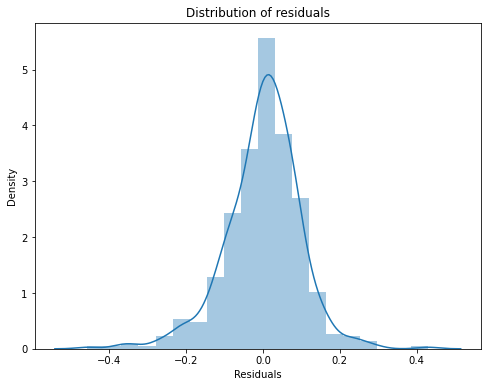

In [221]:
# Lets check whether the model_13 is following the assumption
y_train_pred = Model_13.predict(X_train_13)
residual = (y_train - y_train_pred)

# Plotting distribution plot for the residuals
plt.figure(figsize=[8,6])
sns.distplot(residual, bins=20)
plt.title("Distribution of residuals")
plt.xlabel("Residuals")
plt.show()

### Inference from the plot:
  - From the plot it is evident that the error are normally distributed. 

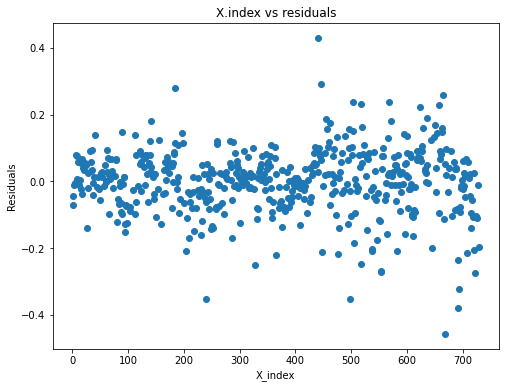

In [222]:
# Checking homoscedasticity assumption and independence assumption
plt.figure(figsize=[8,6])
plt.scatter(X_train.index, residual)
plt.title("X.index vs residuals")
plt.xlabel("X_index")
plt.ylabel("Residuals")
plt.show()

### Inference from the plot:
  - From the plot it is evident that the residuals have almost constant variance (homoscedasticity).
  - There is no pattern in the scatter plot, thus the errors are independent. 

## Model Selection

  - Among all the model Model_13 have high r2 value of 0.827 and adjusted r2 value of 0.824
  - All the p-values of Model_13 are less than 0.001 i.e all the features are significant
  - The maximum VIF value of Model_13 is 4.25, which is good to go ahead, as there will be no multicollinearity problem.
  - The model following all the basic assumptions of linear regression.

In [223]:
Model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.5
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          6.33e-183
Time:                        06:05:49   Log-Likelihood:                 461.22
No. Observations:                 510   AIC:                            -900.4
Df Residuals:                     499   BIC:                            -853.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1268      0.024      5.375      0.000       0.080       0.173
Season_spring    -0.1156      0.017     -6.764      0.000      -0.149      -0.082
Season_winter     0.0563      0.013      4.334      0.000       0.031       0.082
Year_2019         0.2424      0.009     27.302      0.000       0.225       0.260
Month_Feb        -0.0070      0.020     -0.350      0.726      -0.046       0.032
Month_Jul        -0.0662      0.018     -3.604      0.000      -0.102      -0.030
Month_Sep         0.0646      0.016      3.983      0.000       0.033       0.096
Workingday_1      0.0331      0.009      3.516      0.000       0.015       0.052
Weather_2        -0.0790      0.009     -8.431      0.000      -0.097      -0.061
Weather_3        -0.2813      0.031     -9.148      0.000      -0.342      -0.221
Wind_chill        0.5023      0.032     15.457      0.000       0.438       0.566
==============================================================================
Omnibus:                       54.844   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.886
Skew:                          -0.506   Prob(JB):                     5.19e-35
Kurtosis:                       5.531   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Evaluation 

In [224]:
# Merging the wind chill column in test dataset
bike_test = pd.merge(bike_test, bike[["Wind_chill"]], left_index=True, right_index=True)

# Scaling the test dataset
bike_test[Num_bike] = scaler.transform(bike_test[Num_bike])

# Scaling the wind chill column
bike_test[["Wind_chill"]] = scaler4.transform(bike_test[["Wind_chill"]])

# Extracting the required features
X_test = bike_test[X_train_rfe13.columns]

# Adding the constant
X_test_sm = sm.add_constant(X_test)

In [225]:
# Extracting the count column
y_test = bike_test["Count"]

# Predicting the y value for the test data
y_test_pred = Model_13.predict(X_test_sm)

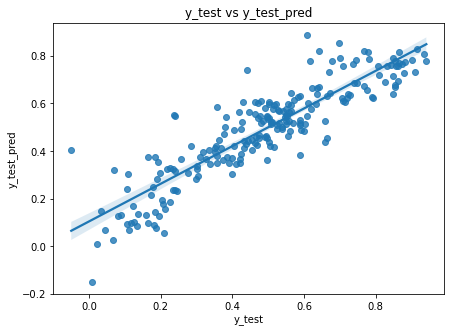

In [226]:
plt.figure(figsize=[7,5])
sns.regplot(y_test, y_test_pred)
plt.title("y_test vs y_test_pred")
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.show()

#### We can see that the equation of the best fitted line is:

$Count = 0.1264 - 0.1174(Season_spring) + 0.0564(Season_winter) + 0.2425(Year_2019) - 0.0663(Month_jul) + 0.646(Month_sep)

                           + 0.0331(Workingday_1) - 0.0788(Weather_2) - 0.2810(Weather_3) + 0.5028(Wind_chill)$ 

### r2 value for the test data 

In [227]:
# Importing the library to calculate r2 score
from sklearn.metrics import r2_score

# Calculating r2 value for test data
r2_test = r2_score(y_test, y_test_pred)
print("The r2 value for the test data is",r2_test)

The r2 value for the test data is 0.7943744454005495


### Adjusted r2 value for the test data 

In [228]:
# Calculating adjusted r2 value
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2_test)*(n-1)/(n-p-1)
print("The adjusted_r2 value for the test data is",adjusted_r2)

The adjusted_r2 value for the test data is 0.784488601429422


### Final Result Comparison
  - Train R^2 :0.827
  - Train Adjusted R^2 :0.824
  - Test R^2 :0.795
  - Test Adjusted R^2 :0.786 

This seems to be a good model that can very well 'Generalize' various datasets.

## Final Report
As per our final model. the top three features for predicting the dependent variable i.e factor influencing the demand of the booking are:

  #### 1. Wind chill (derived variable from temperature and wind speed):
  Have coefficient value of '0.5028', which indicates that a unit increase in wind chill variable increases the bike hire numbers   by 0.5028 units.

  #### 2. Weather_3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds):
  Have coefficient value of '-0.2810', which indicates that a unit increase in weather_3 decreases the bike hire numbers by  0.2810 units.

  #### 3. Year_2019:
  Have coefficient value of '0.2425', which indicates that a unit increase in year variable increases the bike hire number by 0.2425 units.

So it is suggested to give utmost important for the above said top three factors that affect the demand of the bike. Apart from these top three factors, there are some more variable on which the bike demand is depends on, and they are:

#### 4. Season_spring
Have coefficient value of '-0.1174'

#### 5. Weather_2
Have coefficient value of '-0.0788'

#### 6. Month_Jul
Have coefficient value of '-0.0663'

#### 7. Month_Sep
Have coefficient value of '0.0646'

#### 8. Season_winter
Have coefficient value of '0.0564'

#### 9. Workingday_1
Have coefficient value of '0.0331'